In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
# import clip
# from PIL import Image
# import torch
from IPython.display import display

In [5]:
# Download the dataset (flickrUser.csv) from the following link (skip if you already have the dataset):
file_id = '1Q2IJi_xn2cbUTcmtJ26rLPvKcjWT1bsb'
url = f'https://drive.google.com/uc?id={file_id}'
# The file will be saved as 'flickrUser.csv'
output = 'flickrUser.csv'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Q2IJi_xn2cbUTcmtJ26rLPvKcjWT1bsb
From (redirected): https://drive.google.com/uc?id=1Q2IJi_xn2cbUTcmtJ26rLPvKcjWT1bsb&confirm=t&uuid=c32a9e7c-be89-4c49-ae3d-aad8c6f7d018
To: /home/abdu/home/ECCV 2024/flickrUser.csv
100%|██████████| 278M/278M [00:02<00:00, 97.2MB/s] 


'flickrUser.csv'

In [2]:
# Load the dataset
df = pd.read_csv('flickrUser.csv')
df_train = df[df['set'] == 'train']
df_test = df[df['set'] == 'test']

In [3]:
df.head()

,user,img_id,img_url,views,favorites,comments,upload_date,user_gender,user_timezone_label,user_timezone_id,...,rule of thirds,shallow dof,silhouette,soft focus,vanishing point,main_feature,quality_score,emotion_score,emotion,emotion_category
0,99856385@N00,871879294,https://farm2.staticflickr.com/1095/871879294_...,1401,1,0,2007-07-22,M,Pacific Time (US & Canada); Tijuana,PST8PDT,...,0.132317,0.129257,0.096200,0.129303,0.146249,vanishing point,0.377751,0.527344,This image makes me happy,Contentment
1,99856385@N00,844661345,https://farm2.staticflickr.com/1086/844661345_...,908,2,3,2007-07-18,M,Pacific Time (US & Canada); Tijuana,PST8PDT,...,0.143546,0.127069,0.099577,0.116660,0.126529,rule of thirds,0.313734,0.269043,This image makes me angry,Anger
2,99856385@N00,73377743,https://farm1.staticflickr.com/20/73377743_a04...,1016,2,0,2005-12-14,M,Pacific Time (US & Canada); Tijuana,PST8PDT,...,0.141628,0.131062,0.120148,0.118825,0.131690,complementary colors,0.423448,0.190308,This image is thrilling,Excitement
3,99856385@N00,6746902917,https://farm8.staticflickr.com/7172/6746902917...,137,1,0,2012-01-23,M,Pacific Time (US & Canada); Tijuana,PST8PDT,...,0.129272,0.109076,0.110654,0.135553,0.128972,light on white,0.494865,0.361572,This image gives me a feeling of disgust,Disgust
4,99856385@N00,616837596,https://farm2.staticflickr.com/1075/616837596_...,235,2,0,2007-06-25,M,Pacific Time (US & Canada); Tijuana,PST8PDT,...,0.145324,0.115524,0.113497,0.120785,0.122457,long exposure,0.707541,0.507324,This image is thrilling,Excitement


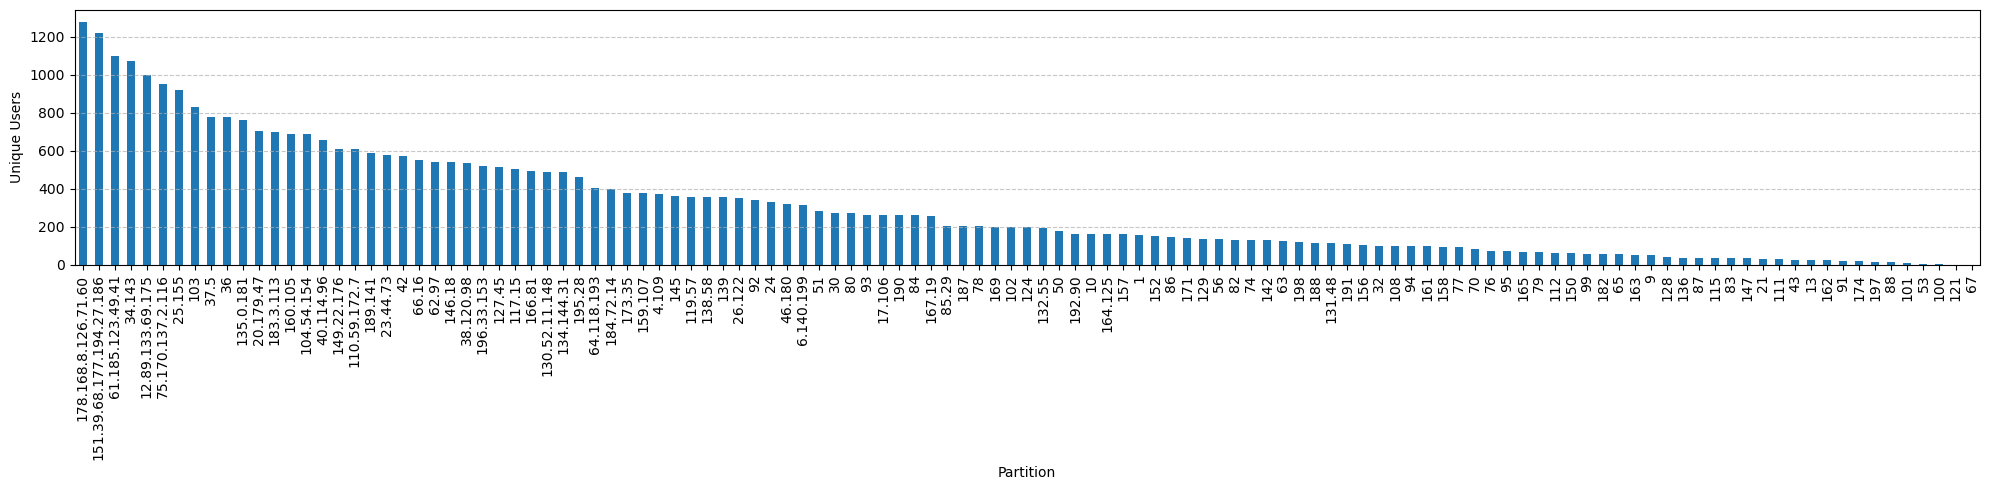

In [4]:
# Common Interestingness (cf. Figure 2)
unique_users = df_train.groupby(['partition'])['user'].nunique().reset_index(name='unique_users')
unique_users.sort_values(by='unique_users', ascending=False, inplace=True)
unique_users.reset_index(drop=True, inplace=True)

# Bar plot of unique users per cluster
unique_users['unique_users'].plot(kind='bar', figsize=(20, 5))
plt.xlabel('Partition')
plt.ylabel('Unique Users')
plt.xticks(ticks=np.arange(0, len(unique_users), 1), labels=unique_users['partition'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_train_common = df_train[(df_train['group'] == 0)]
df_train_interplay = df_train[(df_train['group'] == 1)]
df_train_subjective = df_train[(df_train['group'] == 2)]

In [53]:
# Perceptual Features (cf. Table 1)
perceptual_features_common = df_train_common.value_counts(subset = ['main_feature'], normalize=True).round(4) * 100
aesthetic_score_common = df_train_common['quality_score'].describe()[['25%', '50%', '75%']].round(4) * 100

perceptual_features_interplay = df_train_interplay.value_counts(subset = ['main_feature'], normalize=True).round(4) * 100
aesthetic_score_interplay = df_train_interplay['quality_score'].describe()[['25%', '50%', '75%']].round(4) * 100

perceptual_features_subjective = df_train_subjective.value_counts(subset = ['main_feature'], normalize=True).round(4) * 100
aesthetic_score_subjective = df_train_subjective['quality_score'].describe()[['25%', '50%', '75%']].round(4) * 100

df_perceptual_features = pd.concat([perceptual_features_common, perceptual_features_interplay, perceptual_features_subjective], axis=1)
df_perceptual_features.columns = ['Common', 'Interplay', 'Subjective']
df_perceptual_features['Delta'] = df_perceptual_features['Common'] - df_perceptual_features['Subjective']
df_perceptual_features.sort_values(by='Delta', ascending=False, inplace=True)
df_perceptual_features.index.names = ['Scores from VILA']
display(df_perceptual_features)

df_aesthetic_score = pd.concat([aesthetic_score_common, aesthetic_score_interplay, aesthetic_score_subjective], axis=1)
df_aesthetic_score.columns = ['Common', 'Interplay', 'Subjective']
df_aesthetic_score['Delta'] = df_aesthetic_score['Common'] - df_aesthetic_score['Subjective']
df_aesthetic_score.index.names = ['Scores from VILA']
display(df_aesthetic_score)

,Common,Interplay,Subjective,Delta
Scores from VILA,,,,
hdr,20.68,15.81,15.22,5.46
shallow dof,8.39,4.51,3.10,5.29
vanishing point,8.88,9.59,4.39,4.49
long exposure,6.68,1.52,2.42,4.26
silhouette,3.51,1.33,0.87,2.64
macro,3.76,1.65,2.06,1.70
soft focus,10.03,7.92,9.41,0.62
image grain,1.48,0.97,1.73,-0.25
rule of thirds,14.82,23.92,15.43,-0.61


,Common,Interplay,Subjective,Delta
Scores from VILA,,,,
25%,47.03,39.30,38.14,8.89
50%,55.49,47.78,46.72,8.77
75%,63.66,56.14,55.34,8.32


In [52]:
# Connotative Features (cf. Table 3)
connotative_features_common = df_train_common.value_counts(subset = ['emotion_category'], normalize=True).round(4) * 100
connotative_features_interplay = df_train_interplay.value_counts(subset = ['emotion_category'], normalize=True).round(4) * 100
connotative_features_subjective = df_train_subjective.value_counts(subset = ['emotion_category'], normalize=True).round(4) * 100

connotative_features_positive = ['Excitement', 'Awe', 'Contentment', 'Amusement']
connotative_features_negative = ['Sadness', 'Disgust', 'Anger', 'Fear']

df_connotative_features_positive = pd.concat([connotative_features_common[connotative_features_positive], connotative_features_interplay[connotative_features_positive], connotative_features_subjective[connotative_features_positive]], axis=1)
df_connotative_features_positive.columns = ['Common', 'Interplay', 'Subjective']
df_connotative_features_positive.index = ['Excitement', 'Awe', 'Contentment', 'Amusement']
df_connotative_features_positive['Delta'] = df_connotative_features_positive['Common'] - df_connotative_features_positive['Subjective']
df_connotative_features_positive.sort_values(by='Delta', ascending=False, inplace=True)
df_connotative_features_positive.loc['Sum Positive'] = df_connotative_features_positive.sum()
df_connotative_features_positive.index.names = ['Scores from CLIP']
display(df_connotative_features_positive)

df_connotative_features_negative = pd.concat([connotative_features_common[connotative_features_negative], connotative_features_interplay[connotative_features_negative], connotative_features_subjective[connotative_features_negative]], axis=1)
df_connotative_features_negative.columns = ['Common', 'Interplay', 'Subjective']
df_connotative_features_negative.index = ['Sadness', 'Disgust', 'Anger', 'Fear']
df_connotative_features_negative['Delta'] = df_connotative_features_negative['Common'] - df_connotative_features_negative['Subjective']
df_connotative_features_negative.sort_values(by='Delta', ascending=False, inplace=True)
df_connotative_features_negative.loc['Sum Negative'] = df_connotative_features_negative.sum()
df_connotative_features_negative.index.names = ['Scores from CLIP']
display(df_connotative_features_negative)

,Common,Interplay,Subjective,Delta
Scores from CLIP,,,,
Excitement,60.80,35.56,32.13,28.67
Awe,18.07,15.82,9.40,8.67
Contentment,4.79,10.77,9.43,-4.64
Amusement,5.59,16.02,17.56,-11.97
Sum Positive,89.25,78.17,68.52,20.73


,Common,Interplay,Subjective,Delta
Scores from CLIP,,,,
Fear,0.65,2.83,2.10,-1.45
Disgust,0.91,3.81,6.60,-5.69
Sadness,8.25,12.32,14.63,-6.38
Anger,0.95,2.85,8.15,-7.20
Sum Negative,10.76,21.81,31.48,-20.72


In [ ]:
# Computational Model (cf. Figure 6)
# TODO: Train the model using the training set and publish the model on GitHub
# TODO: Publish SampleData with Eiffel Tower and Liberty Statue images on GitHub